In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [47]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sonar.all-data.csv',header=None)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [49]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [50]:
df.iloc[:,-1:]

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
df.iloc[:,-1:] = le.fit_transform(df.iloc[:,-1:])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
X = df.drop(df.iloc[:,-1:], axis=1)
Y = df.iloc[:,-1:]

In [54]:
Y.shape

(208, 1)

In [55]:
Y = np.ravel(Y)

In [56]:
Y.shape

(208,)

In [57]:
#Splitting the dataset into the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [58]:
#Putting the values in the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [59]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
expained_variance = pca.explained_variance_ratio_

In [60]:
X.shape

(208, 60)

In [61]:
X_train.shape

(166, 2)

In [62]:
X_test.shape

(42, 2)

Text(0, 0.5, 'Second principle component')

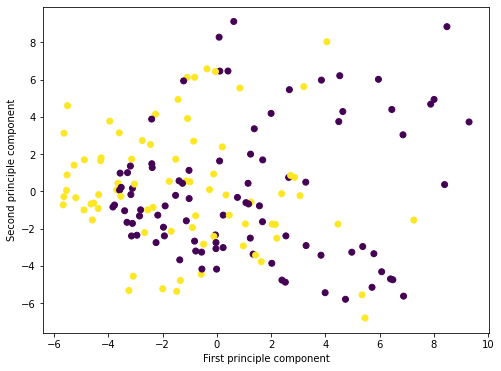

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [66]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [79]:
### cross validation
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Avg. Accuracy %f Std. (%f) Max Accuracy (%f) Min Accuracy (%f)" % (name, cv_results.mean(), cv_results.std(), 
                                                                                  cv_results.max(), cv_results.min())
    print(msg)

LR: Avg. Accuracy 0.626103 Std. (0.093473) Max Accuracy (0.764706) Min Accuracy (0.500000)
RF: Avg. Accuracy 0.669118 Std. (0.094379) Max Accuracy (0.823529) Min Accuracy (0.470588)
KNN: Avg. Accuracy 0.669118 Std. (0.090638) Max Accuracy (0.823529) Min Accuracy (0.529412)
DT: Avg. Accuracy 0.670221 Std. (0.106669) Max Accuracy (0.812500) Min Accuracy (0.470588)
NB: Avg. Accuracy 0.619853 Std. (0.092194) Max Accuracy (0.764706) Min Accuracy (0.500000)
SVM: Avg. Accuracy 0.674632 Std. (0.092779) Max Accuracy (0.764706) Min Accuracy (0.529412)


In [81]:
### pipelines
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledRf', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()), ('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [82]:
results = []
names = []
for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Avg. Accuracy %f Std. (%f) Max Accuracy (%f) Min Accuracy (%f)" % (name, cv_results.mean(), cv_results.std(), 
                                                                                  cv_results.max(), cv_results.min())
    print(msg)

ScaledLR: Avg. Accuracy 0.626103 Std. (0.093473) Max Accuracy (0.764706) Min Accuracy (0.500000)
ScaledRf: Avg. Accuracy 0.680515 Std. (0.071032) Max Accuracy (0.823529) Min Accuracy (0.588235)
ScaledKNN: Avg. Accuracy 0.681250 Std. (0.081300) Max Accuracy (0.823529) Min Accuracy (0.529412)
ScaledDT: Avg. Accuracy 0.676471 Std. (0.105663) Max Accuracy (0.812500) Min Accuracy (0.470588)
ScaledNB: Avg. Accuracy 0.619853 Std. (0.092194) Max Accuracy (0.764706) Min Accuracy (0.500000)
ScaledSVM: Avg. Accuracy 0.674632 Std. (0.092779) Max Accuracy (0.764706) Min Accuracy (0.529412)


In [83]:
# KNN algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [87]:
grid_result.cv_results_

{'mean_fit_time': array([0.0009306 , 0.00082321, 0.00129282, 0.00157161, 0.00072482,
        0.00084763, 0.00152025, 0.00145366, 0.00076103, 0.00086806,
        0.00118146, 0.00138168, 0.00079656, 0.000914  , 0.00116725,
        0.00134966, 0.00080218, 0.00095525, 0.00116861, 0.00130868,
        0.00081878, 0.00096622, 0.00118597, 0.00141685, 0.00086093,
        0.00101535, 0.00119102, 0.00130992, 0.00090332, 0.0010921 ,
        0.00125439, 0.00128183, 0.00092049, 0.001125  , 0.00120797,
        0.00128238, 0.00097167, 0.00111825, 0.00120835, 0.00126588]),
 'mean_score_time': array([0.00043972, 0.00034199, 0.00046217, 0.00042193, 0.00031106,
        0.00031872, 0.00045996, 0.0003809 , 0.00030468, 0.00030775,
        0.00035961, 0.00036514, 0.00030825, 0.00032022, 0.00034637,
        0.00036123, 0.00031404, 0.00031395, 0.00035629, 0.00036945,
        0.00031078, 0.00031261, 0.00035119, 0.00040214, 0.00031605,
        0.00031457, 0.00035992, 0.00037067, 0.00030906, 0.00032337,
        0.

In [88]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.686765 using {'C': 1.7, 'kernel': 'rbf'}
#10 0.631985 (0.079116) with: {'C': 0.1, 'kernel': 'linear'}
#22 0.595221 (0.100516) with: {'C': 0.1, 'kernel': 'poly'}
#21 0.601838 (0.074878) with: {'C': 0.1, 'kernel': 'rbf'}
#12 0.607721 (0.059940) with: {'C': 0.1, 'kernel': 'sigmoid'}
#11 0.613235 (0.085683) with: {'C': 0.3, 'kernel': 'linear'}
#23 0.582353 (0.111151) with: {'C': 0.3, 'kernel': 'poly'}
#8 0.650735 (0.073713) with: {'C': 0.3, 'kernel': 'rbf'}
#32 0.553676 (0.081036) with: {'C': 0.3, 'kernel': 'sigmoid'}
#13 0.607353 (0.089147) with: {'C': 0.5, 'kernel': 'linear'}
#25 0.576471 (0.094648) with: {'C': 0.5, 'kernel': 'poly'}
#9 0.650368 (0.085028) with: {'C': 0.5, 'kernel': 'rbf'}
#33 0.529779 (0.089399) with: {'C': 0.5, 'kernel': 'sigmoid'}
#13 0.607353 (0.089147) with: {'C': 0.7, 'kernel': 'linear'}
#24 0.577206 (0.103752) with: {'C': 0.7, 'kernel': 'poly'}
#7 0.662500 (0.076816) with: {'C': 0.7, 'kernel': 'rbf'}
#34 0.511765 (0.069286) with: {'C': 0.7, 'kernel': 'sigm

In [89]:
# SVM algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [90]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.686765 using {'C': 1.7, 'kernel': 'rbf'}
#10 0.631985 (0.079116) with: {'C': 0.1, 'kernel': 'linear'}
#22 0.595221 (0.100516) with: {'C': 0.1, 'kernel': 'poly'}
#21 0.601838 (0.074878) with: {'C': 0.1, 'kernel': 'rbf'}
#12 0.607721 (0.059940) with: {'C': 0.1, 'kernel': 'sigmoid'}
#11 0.613235 (0.085683) with: {'C': 0.3, 'kernel': 'linear'}
#23 0.582353 (0.111151) with: {'C': 0.3, 'kernel': 'poly'}
#8 0.650735 (0.073713) with: {'C': 0.3, 'kernel': 'rbf'}
#32 0.553676 (0.081036) with: {'C': 0.3, 'kernel': 'sigmoid'}
#13 0.607353 (0.089147) with: {'C': 0.5, 'kernel': 'linear'}
#25 0.576471 (0.094648) with: {'C': 0.5, 'kernel': 'poly'}
#9 0.650368 (0.085028) with: {'C': 0.5, 'kernel': 'rbf'}
#33 0.529779 (0.089399) with: {'C': 0.5, 'kernel': 'sigmoid'}
#13 0.607353 (0.089147) with: {'C': 0.7, 'kernel': 'linear'}
#24 0.577206 (0.103752) with: {'C': 0.7, 'kernel': 'poly'}
#7 0.662500 (0.076816) with: {'C': 0.7, 'kernel': 'rbf'}
#34 0.511765 (0.069286) with: {'C': 0.7, 'kernel': 'sigm

In [91]:
# ensembles
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))

In [92]:
results = []
names = []
for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Avg. Accuracy %f Std. (%f) Max Accuracy (%f) Min Accuracy (%f)" % (name, cv_results.mean(), cv_results.std(), 
                                                                                  cv_results.max(), cv_results.min())
    print(msg)

AB: Avg. Accuracy 0.620956 Std. (0.091047) Max Accuracy (0.764706) Min Accuracy (0.500000)
GBM: Avg. Accuracy 0.673897 Std. (0.093198) Max Accuracy (0.823529) Min Accuracy (0.562500)
RF: Avg. Accuracy 0.668382 Std. (0.097420) Max Accuracy (0.823529) Min Accuracy (0.529412)
